In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import orbital as orb

import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from IPython.display import HTML

### Using Orbital Py to find our planets inital velocities and positions using data from our narrowed data file 

In [2]:
TRAPPIST1=orb.bodies.Body(1.989e30*0.089,6.674e-11*1.989e30*(1/(1000**3))*0.089,1,1,1)

In [3]:
trappist1=pd.read_csv('TRAPPIST1.csv',skiprows=50,delimiter=',')

In [4]:
v=[]
r=[]
for i in range(len(trappist1)):
    elements=orb.elements.KeplerianElements(149.597870700e6*trappist1['pl_orbsmax'][i],trappist1['pl_orbeccen'][i],0,np.radians(0),np.radians(trappist1['pl_orblper'][i]),0,body=TRAPPIST1)
    r.append(elements.r)
    v.append(elements.v)

In [5]:
r

[Position(x=1578688.8665992185, y=-674670.9004919394, z=-0.0),
 Position(x=506720.73546988145, y=-2295146.1961544883, z=-0.0),
 Position(x=3266851.445034162, y=-501649.23078744806, z=-0.0),
 Position(x=-1373538.076224404, y=4136237.3918816806, z=0.0),
 Position(x=5639226.940600028, y=874006.2999739383, z=0.0),
 Position(x=-6861493.173002854, y=-1376043.8143047001, z=-0.0),
 Position(x=8596280.483112507, y=-3313581.5912246522, z=-0.0)]

In [6]:
v

[Velocity(x=32.70094387567825, y=76.51821945511037, z=0.0),
 Velocity(x=69.45665735384574, y=15.334591128264341, z=0.0),
 Velocity(x=9.112346413954395, y=59.34162802034068, z=0.0),
 Velocity(x=-49.53760128232967, y=-16.450163547104513, z=0.0),
 Velocity(x=-7.003817305022796, y=45.1897374592185, z=0.0),
 Velocity(x=8.087560307201123, y=-40.327741934692135, z=-0.0),
 Velocity(x=12.91643810732782, y=33.50855313398711, z=0.0)]

### Constants for our function to run

In [7]:
G           = 6.67e-11

Ms          = (1.989e30 * 0.089)     # Trappist's star
Mb          = 5.972e24 * 1.374       # planet b     
Mc          = 5.972e24 * 1.308       # planet c
Md          = 5.972e24 * 0.388       # planet d
Me          = 5.972e24 * 0.692       # planet e
Mf          = 5.972e24 * 1.039       # planet f
Mg          = 5.972e24 * 1.321       # planet g
Mh          = 5.972e24 * 0.326       # planet h

AU          = 1.5e11
daysec      = 24.0*60*60

gravconst_b = G*Mb*Ms   #Gravitational Constant used for force equation later  
gravconst_c = G*Mc*Ms
gravconst_d = G*Md*Ms
gravconst_e = G*Me*Ms
gravconst_f = G*Mf*Ms
gravconst_g = G*Mg*Ms
gravconst_h = G*Mh*Ms

# setup the starting conditions, gained from the orbitalpy code ran above
# planet b
xb,yb,zb    = 1578688.8665992185*1000, -674670.9004919394*1000, 0
xvb,yvb,zvb = 32.70094387567825*1000, 76.51821945511037*1000, 0

# planet c
xc,yc,zc    = 506720.735469881452*1000,-2295146.1961544883*1000,0
xvc,yvc,zvc = 69.45665735384574*1000,15.334591128264341*1000,0

# panet d
xd,yd,zd    = 3266851.445034162*1000, -501649.23078744806*1000, 0
xvd,yvd,zvd = 9.112346413954395*1000, 59.34162802034068*1000,0

# panet e
xe,ye,ze    = -1373538.076224404*1000, 4136237.3918816806*1000, 0
xve,yve,zve = -49.53760128232967*1000, -16.450163547104513*1000,0

# panet f
xf,yf,zf    = 5639226.940600028*1000, 874006.2999739383*1000,0
xvf,yvf,zvf = -7.003817305022796*1000, 45.1897374592185*1000,0

# panet g
xg,yg,zg    = -6861493.173002854*1000, -1376043.8143047001*1000,0
xvg,yvg,zvg = 8.087560307201123*1000, -40.327741934692135*1000,0

# panet h
xh,yh,zh    = 8596280.483112507*1000, -3313581.5912246522*1000,0
xvh,yvh,zvh = 12.91643810732782*1000,33.50855313398711*1000,0

# star
xs,ys,zs    = 0,0,0
xvs,yvs,zvs = 0,0,0

t           = 0.0
dt          = (0.01)*daysec # every frame move this time

xblist,yblist,zblist = [],[],[]    #iniialising the position lists
xslist,yslist,zslist = [],[],[]
xclist,yclist,zclist = [],[],[]
xdlist,ydlist,zdlist = [],[],[]
xelist,yelist,zelist = [],[],[]
xflist,yflist,zflist = [],[],[]
xglist,yglist,zglist = [],[],[]
xhlist,yhlist,zhlist = [],[],[]


In [8]:
# start simulation
while t<365*daysec:
    ################ planet b #############
    # compute G force on planet b
    rx,ry,rz = xb - xs, yb - ys, zb - zs  #findin the distance between the planet and the star 
    modr3_b = (rx**2+ry**2+rz**2)**1.5 
    fx_b = -gravconst_b*rx/modr3_b   #Calculating the force in each direction that the planet faces
    fy_b = -gravconst_b*ry/modr3_b
    fz_b = -gravconst_b*rz/modr3_b
    
    # update velcocity
    xvb += fx_b*dt/Mb   #using the force to find the velcocity by F/m * t
    yvb += fy_b*dt/Mb
    zvb += fz_b*dt/Mb
    
    # update position
    xb += xvb*dt       #using the found velocity to find the position 
    yb += yvb*dt 
    zb += zvb*dt
    
    # save the position in list
    xblist.append(xb)
    yblist.append(yb)
    zblist.append(zb)
    
    ################ Planet C ##############
    # compute G force on Planet C
    rx_c,ry_c,rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2+ry_c**2+rz_c**2)**1.5
    fx_c = -gravconst_c*rx_c/modr3_c
    fy_c = -gravconst_c*ry_c/modr3_c
    fz_c = -gravconst_c*rz_c/modr3_c
    
    xvc += fx_c*dt/Mc
    yvc += fy_c*dt/Mc
    zvc += fz_c*dt/Mc
    
    # update position
    xc += xvc*dt
    yc += yvc*dt
    zc += zvc*dt
    
    # add to list
    xclist.append(xc)
    yclist.append(yc)
    zclist.append(zc)
    
    ################ Planet D ##############
    # compute G force on Planet D
    rx_d,ry_d,rz_d = xd - xs, yd - ys, zd - zs
    modr3_d = (rx_d**2+ry_d**2+rz_d**2)**1.5
    fx_d = -gravconst_d*rx_d/modr3_d
    fy_d = -gravconst_d*ry_d/modr3_d
    fz_d = -gravconst_d*rz_d/modr3_d
    
    xvd += fx_d*dt/Md
    yvd += fy_d*dt/Md
    zvd += fz_d*dt/Md
    
    # update position
    xd += xvd*dt
    yd += yvd*dt 
    zd += zvd*dt
    
    # add to list
    xdlist.append(xd)
    ydlist.append(yd)
    zdlist.append(zd)
    
    ################ planet E #############
    # compute G force on planet E
    rx,ry,rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2+ry**2+rz**2)**1.5
    fx_e = -gravconst_e*rx/modr3_e
    fy_e = -gravconst_e*ry/modr3_e
    fz_e = -gravconst_e*rz/modr3_e
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xve += fx_e*dt/Me
    yve += fy_e*dt/Me
    zve += fz_e*dt/Me
    
    # update position
    xe += xve*dt
    ye += yve*dt 
    ze += zve*dt
    
    # save the position in list
    xelist.append(xe)
    yelist.append(ye)
    zelist.append(ze)
    
    ################ planet F #############
    # compute G force on planet F
    rx,ry,rz = xf - xs, yf - ys, zf - zs
    modr3_f = (rx**2+ry**2+rz**2)**1.5
    fx_f = -gravconst_f*rx/modr3_f
    fy_f = -gravconst_f*ry/modr3_f
    fz_f = -gravconst_f*rz/modr3_f
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvf += fx_f*dt/Mf
    yvf += fy_f*dt/Mf
    zvf += fz_f*dt/Mf
    
    # update position
    xf += xvf*dt
    yf += yvf*dt 
    zf += zvf*dt
    
    # save the position in list
    xflist.append(xf)
    yflist.append(yf)
    zflist.append(zf)
    
    ################ planet G #############
    # compute G force on planet G
    rx,ry,rz = xg - xs, yg - ys, zg - zs
    modr3_g = (rx**2+ry**2+rz**2)**1.5
    fx_g = -gravconst_g*rx/modr3_g
    fy_g = -gravconst_g*ry/modr3_g
    fz_g = -gravconst_g*rz/modr3_g
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvg += fx_g*dt/Mg
    yvg += fy_g*dt/Mg
    zvg += fz_g*dt/Mg
    
    # update position
    xg += xvg*dt
    yg += yvg*dt 
    zg += zvg*dt
    
    # save the position in list
    xglist.append(xg)
    yglist.append(yg)
    zglist.append(zg)
    
    ################ planet H #############
    # compute G force on planet H
    rx,ry,rz = xh - xs, yh - ys, zh - zs
    modr3_h = (rx**2+ry**2+rz**2)**1.5
    fx_h = -gravconst_h*rx/modr3_h
    fy_h = -gravconst_h*ry/modr3_h
    fz_h = -gravconst_h*rz/modr3_h
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvh += fx_h*dt/Mh
    yvh += fy_h*dt/Mh
    zvh += fz_h*dt/Mh
    
    # update position
    xh += xvh*dt
    yh += yvh*dt 
    zh += zvh*dt
    
    # save the position in list
    xhlist.append(xh)
    yhlist.append(yh)
    zhlist.append(zh)
    
    ################ the star ###########
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvs += -(fx_b + fx_c + fx_d + fx_e + fx_f + fx_g + fx_h)*dt/Ms
    yvs += -(fy_b + fy_c + fy_d + fy_e + fy_f + fy_g + fy_h)*dt/Ms
    zvs += -(fz_b + fz_c + fz_d + fz_e + fz_f + fz_g + fz_h)*dt/Ms
    
    # update position
    xs += xvs*dt
    ys += yvs*dt 
    zs += zvs*dt
    xslist.append(xs)
    yslist.append(ys)
    zslist.append(zs)
    
    # update dt
    t +=dt

print('data ready')
#print(xalist,yalist)



data ready


<IPython.core.display.Javascript object>


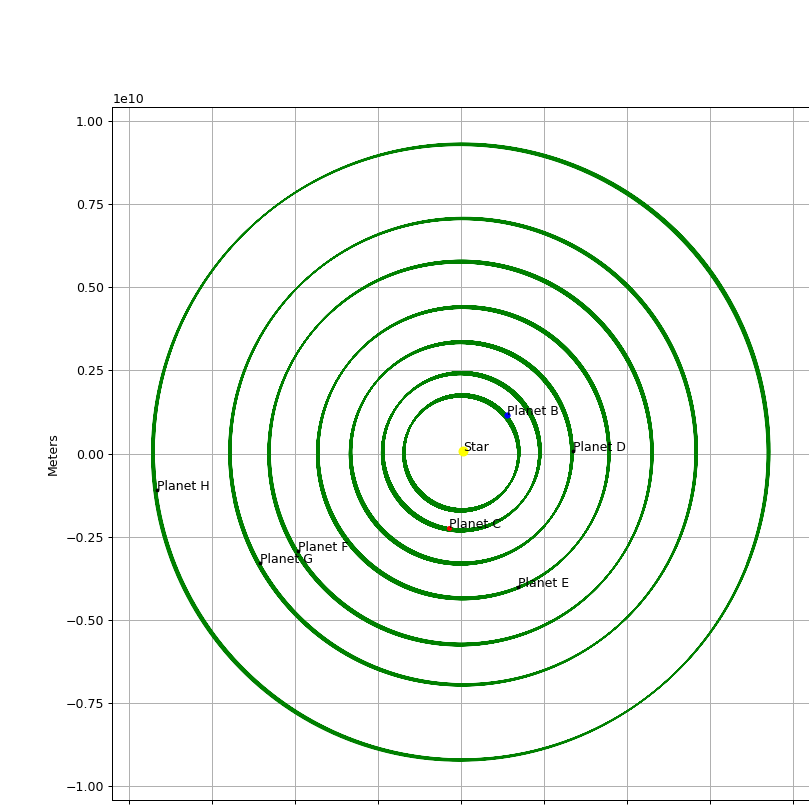

36500


In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_b,     = ax.plot([],[],'-g',lw=1)
point_b,    = ax.plot([xb], [yb], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_b      = ax.text(AU,0,'Planet B')

line_c,     = ax.plot([],[],'-g',lw=1)
point_c,    = ax.plot([xc], [yc], marker="o", markersize=3, markeredgecolor="red", markerfacecolor="red")
text_c      = ax.text(1.666*AU,0,'Planet C')

line_d,     = ax.plot([],[],'-g',lw=1)
point_d,    = ax.plot([xd], [yd], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_d      = ax.text(2*AU,0,'Planet D')

line_e,     = ax.plot([],[],'-g',lw=1)
point_e,    = ax.plot([xe], [ye], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_e      = ax.text(2*AU,0,'Planet E')

line_f,     = ax.plot([],[],'-g',lw=1)
point_f,    = ax.plot([xf], [yf], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_f      = ax.text(2*AU,0,'Planet F')

line_g,     = ax.plot([],[],'-g',lw=1)
point_g,    = ax.plot([xg], [yg], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_g      = ax.text(2*AU,0,'Planet G')

line_h,     = ax.plot([],[],'-g',lw=1)
point_h,    = ax.plot([xh], [yh], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_h      = ax.text(2*AU,0,'Planet H')

point_s,    = ax.plot([0], [0], marker="o", markersize=7, markeredgecolor="yellow", markerfacecolor="yellow")
text_s      = ax.text(0,0,'Star')

bxdata,bydata = [],[]                   # Planet b track
sxdata,sydata = [],[]                   # Star track
cxdata,cydata = [],[]                   # Planet C track
dxdata,dydata = [],[]                   # Planet D track
exdata,eydata = [],[]
fxdata,fydata = [],[]
gxdata,gydata = [],[]
hxdata,hydata = [],[]


print(len(xblist))

def update(i):
    bxdata.append(xblist[i])
    bydata.append(yblist[i])
    
    cxdata.append(xclist[i])
    cydata.append(yclist[i])
    
    dxdata.append(xdlist[i])
    dydata.append(ydlist[i])
    
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    fxdata.append(xflist[i])
    fydata.append(yflist[i])
    
    gxdata.append(xglist[i])
    gydata.append(yglist[i])
    
    hxdata.append(xhlist[i])
    hydata.append(yhlist[i])
    
    line_b.set_data(bxdata,bydata)
    point_b.set_data(xblist[i],yblist[i])
    text_b.set_position((xblist[i],yblist[i]))
    
    line_c.set_data(cxdata,cydata)
    point_c.set_data(xclist[i],yclist[i])
    text_c.set_position((xclist[i],yclist[i]))
    
    line_d.set_data(dxdata,dydata)
    point_d.set_data(xdlist[i],ydlist[i])
    text_d.set_position((xdlist[i],ydlist[i]))
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))
    
    line_f.set_data(fxdata,fydata)
    point_f.set_data(xflist[i],yflist[i])
    text_f.set_position((xflist[i],yflist[i]))
    
    line_g.set_data(gxdata,gydata)
    point_g.set_data(xglist[i],yglist[i])
    text_g.set_position((xglist[i],yglist[i]))
    
    line_h.set_data(hxdata,hydata)
    point_h.set_data(xhlist[i],yhlist[i])
    text_h.set_position((xhlist[i],yhlist[i]))
    
    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    
    ax.axis('equal')
    ax.set_xlim(-0.07*AU,0.07*AU)
    ax.set_ylim(-0.07*AU,0.07*AU)
    #print(i)
    return line_b,point_s,point_b,line_c,point_c,text_b,text_c,text_s,line_d,point_d,text_d, line_e, point_e, text_e, line_f, point_f, text_f, line_g, point_g, text_g, line_h, point_h, text_h

anim = animation.FuncAnimation(fig,func=update,frames=len(xblist),interval=1,blit=True)
plt.xlabel("Meters")
plt.ylabel("Meters")
plt.show()